In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd

In [3]:
# Load the dataset
df = pd.read_csv("Final_Player_IPL_2025.csv")

In [4]:
df = pd.get_dummies(df, columns=['Team'], drop_first=True)

In [5]:
df = df[:-4]

In [6]:
# Identify only boolean columns (e.g., role_WK, Team_RCB, etc.)
bool_cols = df.select_dtypes(include='bool').columns

# Convert them to int
df[bool_cols] = df[bool_cols].astype(int)


In [7]:
df

,Player,role,Runs,NO,HS,Avg,BF,SR,100,50,...,recent_form,Team_DC,Team_GT,Team_KKR,Team_LSG,Team_MI,Team_PBKS,Team_RCB,Team_RR,Team_SRH
0,Abdul Samad,Batsman,164.0,4.0,45,20.50,93.0,176.34,0.0,0.0,...,0.549,0,0,0,1,0,0,0,0,0
1,Abhinav Manohar,Batsman,61.0,0.0,43,12.20,61.0,100.00,0.0,0.0,...,0.273,0,0,0,0,0,0,0,0,1
2,Abhishek Sharma,Batsman,439.0,0.0,141,33.77,227.0,193.39,1.0,2.0,...,0.914,0,0,0,0,0,0,0,0,1
3,Abishek Porel,WK,301.0,1.0,51,25.08,205.0,146.82,0.0,1.0,...,0.655,1,0,0,0,0,0,0,0,0
4,Adam Zampa,Bowler,0.0,0.0,0,0.00,0.0,0.00,0.0,0.0,...,0.012,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,Yash Thakur,Bowler,0.0,0.0,0,0.00,0.0,0.00,0.0,0.0,...,0.000,0,0,0,0,0,1,0,0,0
195,Yashasvi Jaiswal,Batsman,559.0,1.0,75,43.00,350.0,159.71,0.0,6.0,...,0.990,0,0,0,0,0,0,0,1,0
196,Yudhvir Singh Charak,Bowler,0.0,0.0,0,0.00,0.0,0.00,0.0,0.0,...,0.105,0,0,0,1,0,0,0,0,0
197,Yuzvendra Chahal,Bowler,0.0,0.0,0,0.00,0.0,0.00,0.0,0.0,...,0.823,0,0,0,0,0,1,0,0,0


In [8]:
# Drop columns not needed for training
drop_cols = ['Player', 'Pts','role','HS']
X = df.drop(columns=drop_cols)
y = df['Pts']  # target variable

In [9]:
# Train-test split (optional)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Remove '*' and convert to numeric
df['HS'] = df['HS'].astype(str).str.replace('*', '', regex=False)
df['HS'] = pd.to_numeric(df['HS'], errors='coerce')  # handles any remaining invalid entries


In [11]:
df['HS'] = df['HS'].fillna(0)


In [12]:
non_numeric_cols = X.select_dtypes(include='object').columns
print("Non-numeric columns:", non_numeric_cols.tolist())

Non-numeric columns: []


In [13]:
# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [14]:
# Predict on test set
y_pred = model.predict(X_test)


In [15]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae:.2f}, R²: {r2:.2f}")


MAE: 14.32, R²: 0.94


In [16]:
# Predict on full data to select Best XI
df['predicted_score'] = model.predict(X)


In [17]:
# Rank and pick top 11 players
best_11 = df.sort_values(by='predicted_score', ascending=False).head(11)


In [18]:
# Optional: apply role-based constraints (e.g. 1 WK, 3 bowlers, etc.)
print("\nBest Predicted Playing XI:\n", best_11[['Player', 'role', 'predicted_score']])



Best Predicted Playing XI:
                 Player     role  predicted_score
167  Surya Kumar Yadav  Batsman          305.470
146      Sai Sudharsan  Batsman          289.570
195   Yashasvi Jaiswal  Batsman          269.995
91      Mitchell Marsh  Batsman          268.555
108    Nicholas Pooran       WK          264.620
161       Shreyas Iyer  Batsman          264.095
163       Shubman Gill  Batsman          259.615
115  Prabhsimran Singh       WK          257.270
185        Virat Kohli  Batsman          256.665
2      Abhishek Sharma  Batsman          249.455
60         Jos Buttler       WK          243.365


In [19]:
original_df = pd.read_csv("Final_Player_IPL_2025.csv")  # or the actual path you used


In [20]:
df.Player

0               Abdul Samad
1           Abhinav Manohar
2           Abhishek Sharma
3             Abishek Porel
4                Adam Zampa
               ...         
194             Yash Thakur
195        Yashasvi Jaiswal
196    Yudhvir Singh Charak
197        Yuzvendra Chahal
198          Zeeshan Ansari
Name: Player, Length: 199, dtype: object

In [21]:
df = df.merge(original_df[['Player', 'Team']], on='Player', how='left')


In [22]:
print(df[['Player', 'Team']].head())


            Player Team
0      Abdul Samad  LSG
1  Abhinav Manohar  SRH
2  Abhishek Sharma  SRH
3    Abishek Porel   DC
4       Adam Zampa  SRH


In [23]:
def select_best_xi(df, team1, team2, max_players=11):
    # Step 1: Filter players from the 2 selected teams
    selected_df = df[(df['Team'] == team1) | (df['Team'] == team2)].copy()

    # Step 2: Sort by predicted score (highest first)
    selected_df = selected_df.sort_values(by='predicted_score', ascending=False)

    # Step 3: Create empty final XI
    final_xi = []

    # Step 4: Count holders
    count = {
        'Batsman': 0,
        'Bowler': 0,
        'All-Rounder': 0,
        'WK': 0
    }

    # Step 5: Role-mapped column (ensure consistent naming)
    role_col_map = {
        'Batsman': ['Batsman'],
        'Bowler': ['Bowler'],
        'All-Rounder': ['All-Rounder', 'Allrounder', 'AR'],
        'WK': ['WK', 'Wicketkeeper']
    }

    # Step 6: Select players with constraints
    for _, row in selected_df.iterrows():
        role = row['role']
        if role in role_col_map['Batsman'] and count['Batsman'] < 5:
            final_xi.append(row)
            count['Batsman'] += 1
        elif role in role_col_map['Bowler'] and count['Bowler'] < 4:
            final_xi.append(row)
            count['Bowler'] += 1
        elif role in role_col_map['All-Rounder'] and count['All-Rounder'] < 2:
            final_xi.append(row)
            count['All-Rounder'] += 1
        elif role in role_col_map['WK'] and count['WK'] < 2:
            final_xi.append(row)
            count['WK'] += 1

        # Stop when we have 11
        if len(final_xi) == max_players:
            break

    # Step 7: Create DataFrame from selected rows
    best_11_df = pd.DataFrame(final_xi)
    
    return best_11_df[['Player', 'Team', 'role', 'predicted_score']]



In [28]:
# Example usage:
best_11 = select_best_xi(df, team1='RCB', team2='MI')
print("     Predicted Best Playing XI: RCB vs MI\n", best_11)

     Predicted Best Playing XI: RCB vs MI
                 Player Team         role  predicted_score
167  Surya Kumar Yadav   MI      Batsman          305.470
185        Virat Kohli  RCB      Batsman          256.665
114          Phil Salt  RCB           WK          218.815
144     Ryan Rickelton   MI           WK          211.255
43       Hardik Pandya   MI  All-Rounder          207.380
69       Krunal Pandya  RCB  All-Rounder          204.085
173        Trent Boult   MI       Bowler          203.655
140       Rohit Sharma   MI      Batsman          198.230
61      Josh Hazlewood  RCB       Bowler          192.360
25   Bhuvneshwar Kumar  RCB       Bowler          185.990
55      Jasprit Bumrah   MI       Bowler          184.005


📈 MAE: 14.32
📉 RMSE: 18.91
🎯 R² Score: 0.94


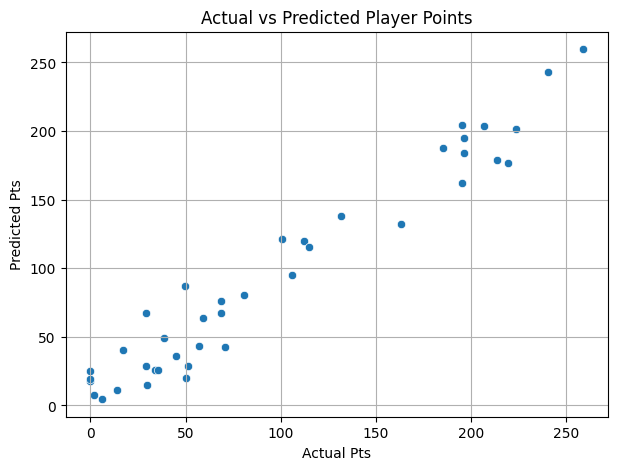

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# y_test and y_pred must be defined from your test set
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"📈 MAE: {mae:.2f}")
print(f"📉 RMSE: {rmse:.2f}")
print(f"🎯 R² Score: {r2:.2f}")

# Scatter Plot of Actual vs Predicted
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Pts")
plt.ylabel("Predicted Pts")
plt.title("Actual vs Predicted Player Points")
plt.grid(True)
plt.show()

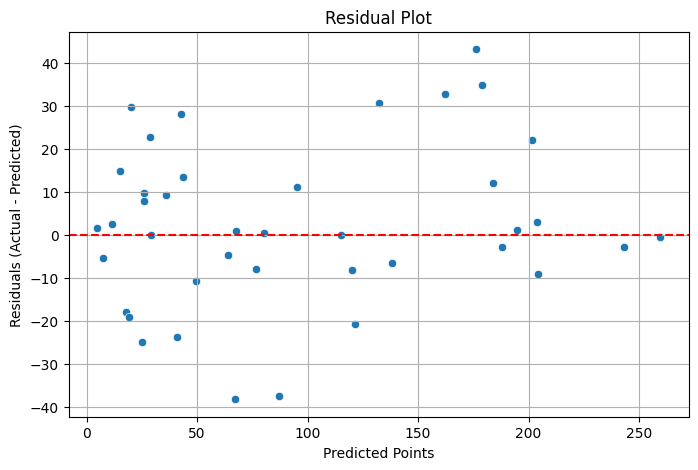

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Points")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


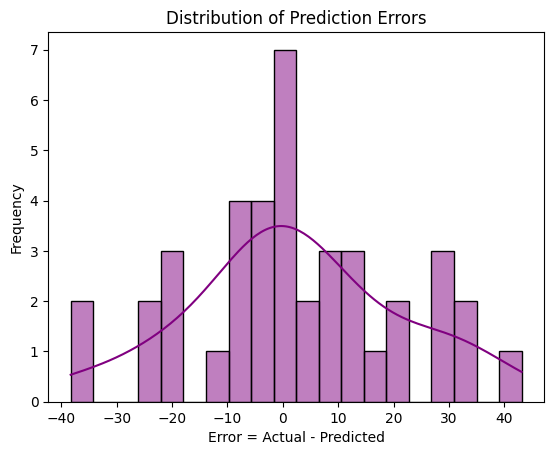

In [51]:
sns.histplot(residuals, bins=20, kde=True, color="purple")
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error = Actual - Predicted")
plt.ylabel("Frequency")
plt.show()


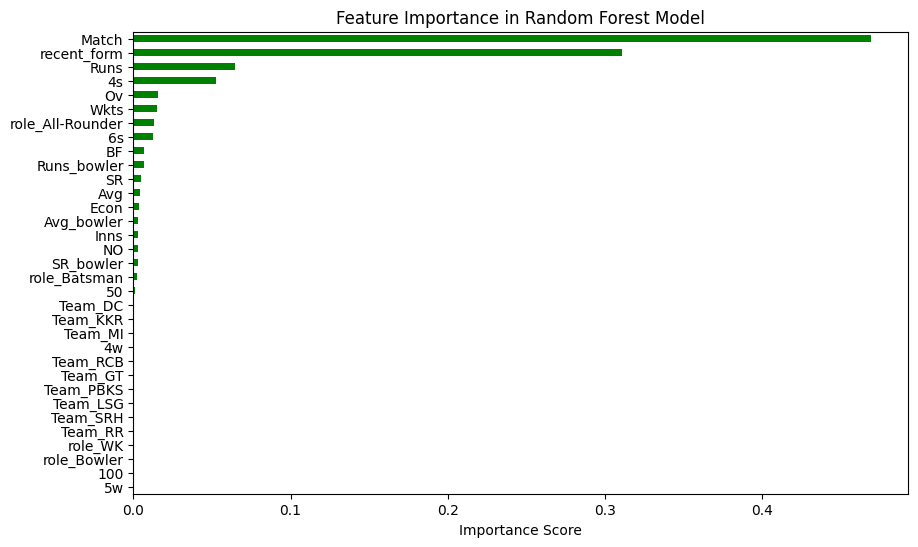

In [52]:
import pandas as pd

feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6), color='green')
plt.title("Feature Importance in Random Forest Model")
plt.xlabel("Importance Score")
plt.show()


In [53]:
df.Match

0      13.0
1       8.0
2      14.0
3      13.0
4       2.0
       ... 
194     2.0
195    14.0
196     4.0
197    14.0
198    10.0
Name: Match, Length: 199, dtype: float64

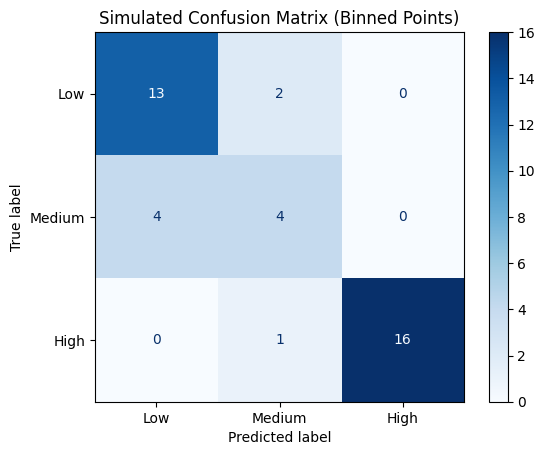

In [54]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Bin both actual and predicted into categories
def bin_score(score):
    if score < 50: return 'Low'
    elif score < 100: return 'Medium'
    else: return 'High'

y_test_binned = [bin_score(y) for y in y_test]
y_pred_binned = [bin_score(y) for y in y_pred]

# Create and display confusion matrix
cm = confusion_matrix(y_test_binned, y_pred_binned, labels=['Low', 'Medium', 'High'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'Medium', 'High'])

disp.plot(cmap="Blues")
plt.title("Simulated Confusion Matrix (Binned Points)")
plt.show()
